# 1.2 Визуализация дискретных распределений и их характеристик на Python

In [1]:
# расширяем поле ноутбука для удобства
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:95% !important;}</style>'))

# убираем предупреждения
import warnings
warnings.filterwarnings('ignore')

C:\Users\User\AppData\Local\Temp\ipykernel_12556\586309859.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [3]:
import scipy.stats as sps

# 1. Дискретные распределения

- 1. Бернулли.
- 2. Биномиальное.
- 3. Геометрическое.
- 4. Отрицательное биномиальное (Паскаля).
- 5. Пуассона.

## 1.1 Распределение Бернулли

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html#scipy.stats.bernoulli

### Пояснение

Распределение Берну́лли в теории вероятностей и математической статистике — дискретное распределение вероятностей, моделирующее случайный эксперимент произвольной природы, при заранее известной вероятности успеха или неудачи.

Например, бросок монеты, или переключение датчика, имеющего два положения, моделируется данным распределением. 

### Обозначение

$X \sim B(p) $

### Параметры

$0 \leq p \leq 1$ - вероятность успеха

### Математическое ожидание

E(X) = p

### Дисперсия 

Var[X] = p(1-p)

### Построение графиков

In [4]:
## задаем распределение с параметрами
rv_bernoulli = sps.bernoulli(p=0.4)

print('Математическое ожидание: ', rv_bernoulli.mean())
print('Дисперсия: ', rv_bernoulli.var())

Математическое ожидание:  0.4
Дисперсия:  0.24


In [8]:
# Формирование выборки
sample = rv_bernoulli.rvs(size=200)

print('Выборочное среднее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Выборочное среднее: 0.330
Выборочная дисперсия: 0.221


### Функция вероятности (PMF)

$P(X=k) = p^k(1-p)^{(1-k)}$

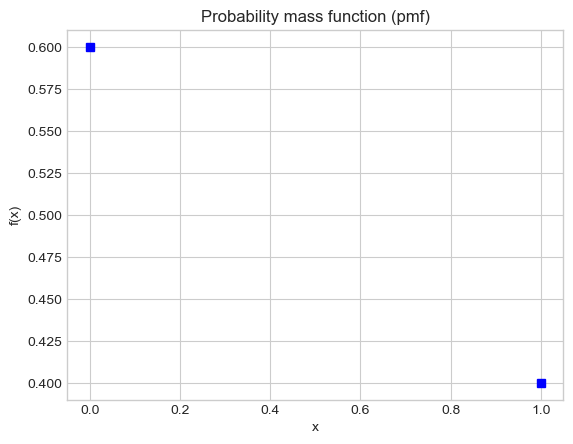

In [10]:
X = [0, 1]

plt.plot(X, rv_bernoulli.pmf(X), ls="",marker="s",color='b')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Probability mass function (pmf)')
plt.show()

### Функция распределения (CDF)

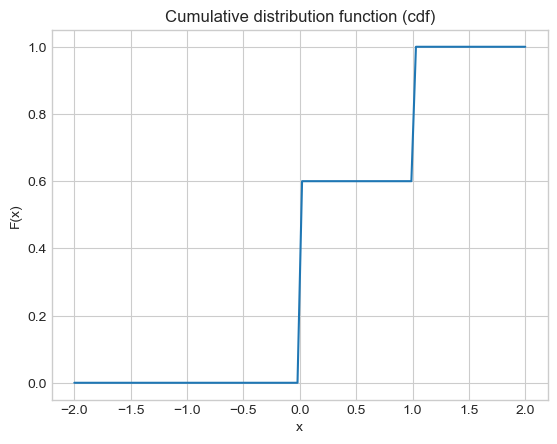

In [11]:
X = np.linspace(-2, 2, 100)

plt.plot(X, rv_bernoulli.cdf(X))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Cumulative distribution function (cdf)')
plt.show()

## 1.2 Биномиальное распределение

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom

### Пояснение

Биномиа́льное распределение с параметрами n и p в теории вероятностей — распределение количества «успехов» в последовательности из n независимых случайных экспериментов, таких, что вероятность «успеха» в каждом из них постоянна и равна p.

Это распределение интенсивно используется в картах контроля качества для оценки доли годной продукции или доли брака.          
В телекоммуникации для оценки доли необслуженных (потерянных) вызовов.

### Обозначение

$X \sim Bin(n, p) $

### Параметры

$ n \geq 0$ - число испытаний       
$0 \leq p \leq 1$ - вероятность успеха

### Математическое ожидание

E(X) = np

### Дисперсия 

Var[X] = np(1-p)

### Построение графиков

In [12]:
## задаем распределение с параметрами
rv_binom = sps.binom(n=20, p=0.4)

print('Математическое ожидание: ', rv_binom.mean())
print('Дисперсия: ', rv_binom.var())

Математическое ожидание:  8.0
Дисперсия:  4.8


In [13]:
# Формирование выборки
sample = rv_binom.rvs(size=200)

print('Выборочное среднее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Выборочное среднее: 7.985
Выборочная дисперсия: 5.225


### Функция вероятности (PMF)

$P(X=k) = {C_n}^k p^k(1-p)^{(n-k)}$

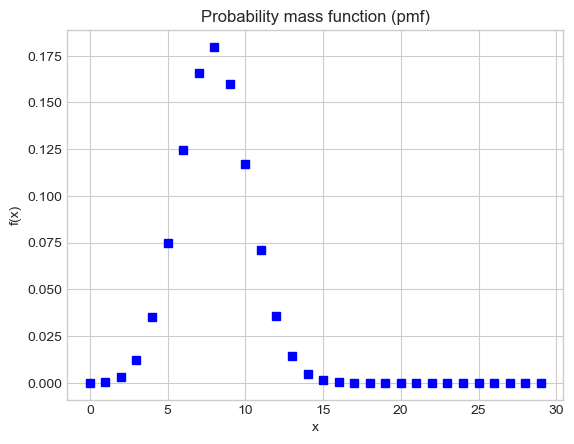

In [14]:
X = np.arange(0, 30)

plt.plot(X, rv_binom.pmf(X), ls="",marker="s",color='b')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Probability mass function (pmf)')
plt.show()

### Функция распределения (CDF)

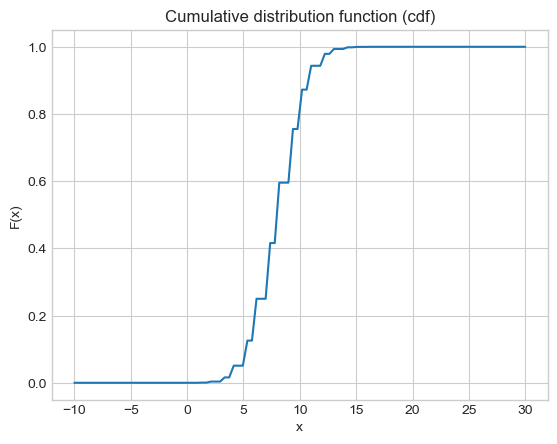

In [17]:
X = np.linspace(-10, 30, 100)

plt.plot(X, rv_binom.cdf(X))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Cumulative distribution function (cdf)')
plt.show()

## 1.3 Геометрическое распределение

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom

### Пояснение

Под геометрическим распределением понимается распределение случайной величины X равной номеру первого успеха в серии испытаний Бернулли и принимающей значения n=1,2,3...

Данное распределение является частным случаем отрицательного биномиального. Поэтому использование данного распределение будет указано далее.

### Обозначение

$X \sim Geom(p) $

### Параметры

$ n \geq 1$ - номер первого успеха       
$0 \leq p \leq 1$ - вероятность успеха

### Математическое ожидание

$E(X) = \frac{1}{p}$

### Дисперсия 

$Var[X] = \frac{(1-p)}{p^2}$

### Построение графиков

In [20]:
## задаем распределение с параметрами
rv_geom = sps.geom(p=0.4)

print('Математическое ожидание: ', rv_geom.mean())
print('Дисперсия: ', rv_geom.var())

Математическое ожидание:  2.5
Дисперсия:  3.749999999999999


In [21]:
# Формирование выборки
sample = rv_geom.rvs(size=200)

print('Выборочное среднее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Выборочное среднее: 2.530
Выборочная дисперсия: 3.699


### Функция вероятности (PMF)

$P(X=k) = (1-p)^{(k-1)}p$

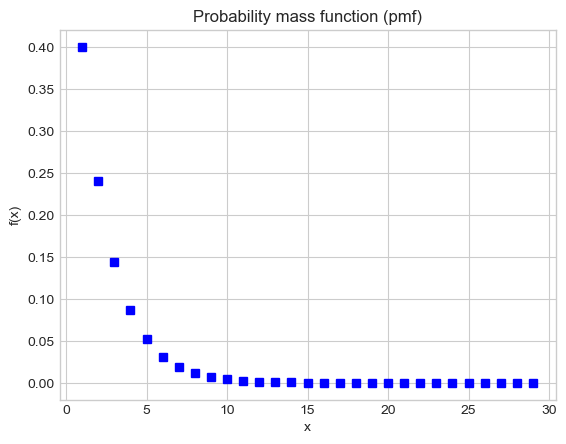

In [22]:
X = np.arange(1, 30)

plt.plot(X, rv_geom.pmf(X), ls="",marker="s",color='b')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Probability mass function (pmf)')
plt.show()

### Функция распределения (CDF)

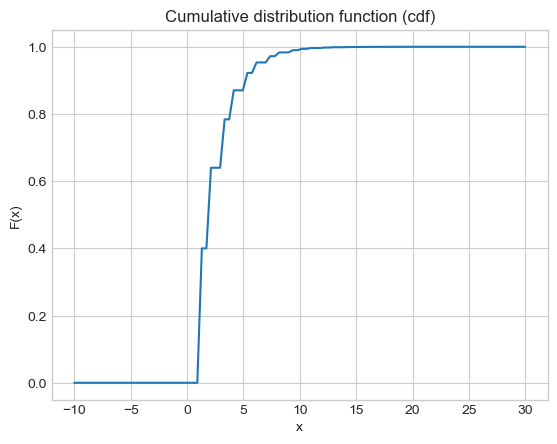

In [23]:
X = np.linspace(-10, 30, 100)

plt.plot(X, rv_geom.cdf(X))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Cumulative distribution function (cdf)')
plt.show()

## 1.4 Отрицательное биномиальное (Паскаля)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html#scipy.stats.nbinom

### Пояснение

Отрицательное биномиальное распределение — распределение дискретной случайной величины, равной числу произошедших неудач в последовательности испытаний Бернулли с вероятностью успеха p, проводимых до r-го успеха.

Данное распределение нашло широкое применение для распределения количества претензий по страхованию здоровья, реже — в сфере автогражданской ответственности или комплексного страхования.

### Обозначение

$X \sim NB(r, p) $

### Параметры

$ r $ - количество успехов  
$k$ - количество неудач       
$0 \leq p \leq 1$ - вероятность успеха

### Математическое ожидание

$E(X) = \frac{r(1-p)}{p}$

### Дисперсия 

$Var[X] = \frac{r(1-p)}{p^2}$

### Построение графиков

In [24]:
## задаем распределение с параметрами
rv_nbin = sps.nbinom(n=10, p=0.4)

print('Математическое ожидание: ', rv_nbin.mean())
print('Дисперсия: ', rv_nbin.var())

Математическое ожидание:  15.0
Дисперсия:  37.49999999999999


In [25]:
# Формирование выборки
sample = rv_nbin.rvs(size=200)

print('Выборочное среднее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Выборочное среднее: 14.815
Выборочная дисперсия: 28.041


### Функция вероятности (PMF)

$P(X=k) = C_{k+r-1}^k(1-p)^{k}p^{r}$

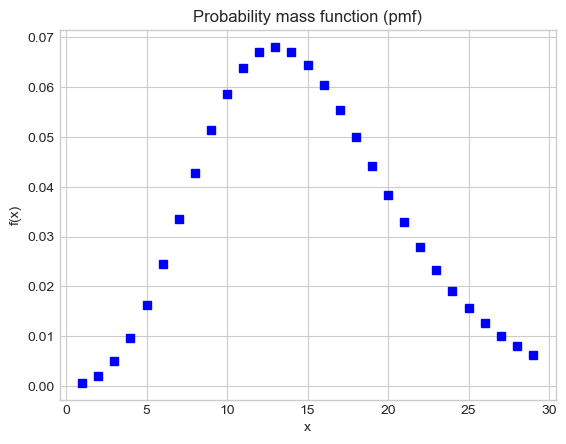

In [26]:
X = np.arange(1, 30)

plt.plot(X, rv_nbin.pmf(X), ls="",marker="s",color='b')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Probability mass function (pmf)')
plt.show()

### Функция распределения (CDF)

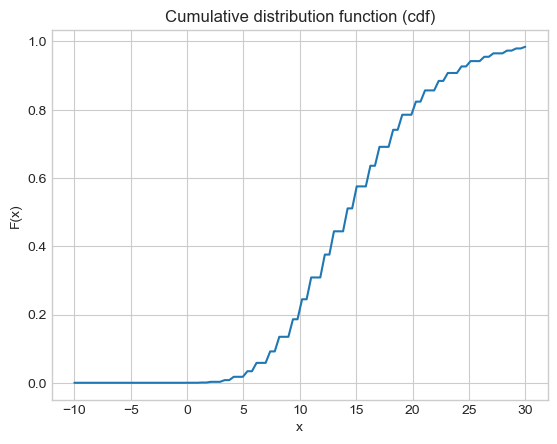

In [43]:
X = np.linspace(-10, 30, 100)

plt.plot(X, rv_nbin.cdf(X))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Cumulative distribution function (cdf)')
plt.show()

## 1.5 Пуассона

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson

### Пояснение

Распределение Пуассона — распределение дискретного типа случайных величин, представляющее собой число событий, произошедших за фиксированное время, при условии, что данные события происходят с некоторой фиксированной средней интенсивностью и независимо друг от друга.

Это распределение интенсивно используется в картах контроля качества, теории массового обслуживания, телекоммуникации, медицинской статистике.

### Обозначение
$X \sim P(\lambda) $

### Параметры

$ k $ — количество событий;   
$\lambda $ — математическое ожидание случайной величины (среднее количество событий за фиксированный промежуток времени).

### Математическое ожидание

$E(X) = \lambda$

### Дисперсия 

$Var[X] = \lambda$

### Построение графиков

In [44]:
## задаем распределение с параметрами
rv_poi = sps.poisson(mu=4)

print('Математическое ожидание: ', rv_poi.mean())
print('Дисперсия: ', rv_poi.var())

Математическое ожидание:  4.0
Дисперсия:  4.0


In [45]:
# Формирование выборки
sample = rv_poi.rvs(size=200)

print('Выборочное среднее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Выборочное среднее: 3.965
Выборочная дисперсия: 3.934


### Функция вероятности (PMF)

$P(X=k) = \frac{\lambda^k}{k!}e^{-\lambda}$

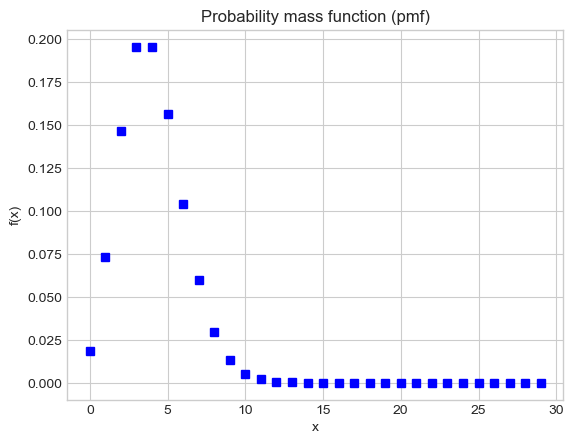

In [46]:
X = np.arange(0, 30)

plt.plot(X, rv_poi.pmf(X), ls="",marker="s",color='b')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Probability mass function (pmf)')
plt.show()

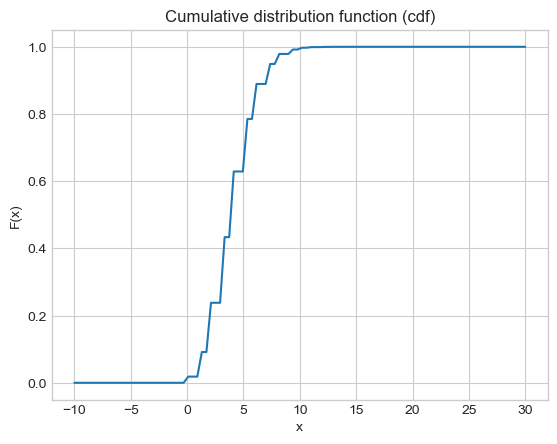

In [47]:
X = np.linspace(-10, 30, 100)

plt.plot(X, rv_poi.cdf(X))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Cumulative distribution function (cdf)')
plt.show()